In [2]:
pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/ec/6c/fab8113424af5049f85717e8e527ca3773299a3c6b02506e66436e19874f/opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.8 MB 812.7 kB/s eta 0:00:48
   ---------------------------------------- 0.3/38.8 MB 2.0 MB/s eta 0:00:20
    --------------------------------------- 0.7/38.8 MB 4.6 MB/s eta 0:00:09
    --------------------------------------- 0.9/38.8 MB 4.7 MB/s eta 0:00:09
   - -------------------------------------- 1.4/38.8 MB 5.6 MB/s eta 0:00:07
   -- ------------------------------------- 2.0/38.8 MB 6.6 MB/s eta 0:00:06
   -- ------------------------------------- 2.5/38.8 MB 7.3 MB/s eta 0:00:05
   --- ------------------------------------ 3.1/38.8 MB 7.9 MB/s eta 0:00:05
   --- -------------

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [24]:
# Replace 'xray_image.jpg' with the path to your X-ray image
image = cv2.imread(r"C:\Users\pranj\Downloads\datannotate2.png", cv2.IMREAD_GRAYSCALE)

# Verify that the image was loaded successfully
if image is None:
    print("Error: Could not load image.")
    exit()


In [25]:
# Apply Gaussian Blur to reduce noise and smooth the image
blurred = cv2.GaussianBlur(image, (5, 5), 0)


In [26]:
# Enhance contrast using Histogram Equalization
equalized = cv2.equalizeHist(blurred)


In [27]:
# Apply Canny Edge Detection
# Adjust threshold1 and threshold2 based on image quality
edges = cv2.Canny(equalized, threshold1=50, threshold2=150)


In [28]:
# Create a structuring element (kernel)
kernel = np.ones((3, 3), np.uint8)

# Dilate the edges to close gaps
dilated = cv2.dilate(edges, kernel, iterations=1)

# Erode to refine the edges
eroded = cv2.erode(dilated, kernel, iterations=1)


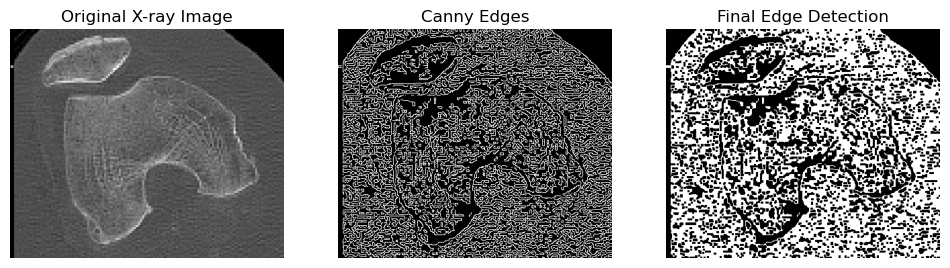

In [29]:
# Plot the original and processed images
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original X-ray Image')
plt.axis('off')

# Edge Detected Image
plt.subplot(1, 3, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')

# After Morphological Operations
plt.subplot(1, 3, 3)
plt.imshow(eroded, cmap='gray')
plt.title('Final Edge Detection')
plt.axis('off')

plt.show()
